In [7]:
# Vehicle Type Classification Project

## Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Ensure compatibility with Google Colab
try:
    from google.colab import drive
    drive.mount('/content/drive')
except ImportError:
    pass


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:

## Step 2: Load Dataset
# Update the dataset path to your environment
DATASET_PATH = "/content/drive/MyDrive/UITS/Seven Semester/Machine Learning/Project/archive/Dataset"

# Load images using ImageDataGenerator
image_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = image_gen.flow_from_directory(
    DATASET_PATH,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_data = image_gen.flow_from_directory(
    DATASET_PATH,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

# Retrieve class labels
labels = list(train_data.class_indices.keys())


Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [9]:
## Step 3: Train a Conventional Model
# Flatten images for Random Forest Classifier
X_train_flat = train_data[0][0].reshape(train_data[0][0].shape[0], -1)
y_train = train_data[0][1]

X_test_flat = validation_data[0][0].reshape(validation_data[0][0].shape[0], -1)
y_test = validation_data[0][1]

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_flat, y_train)

# Evaluate the Random Forest Model
preds = clf.predict(X_test_flat)
rf_accuracy = accuracy_score(y_test, preds)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("\nClassification Report:\n", classification_report(y_test, preds, target_names=labels))


Random Forest Classifier Accuracy: 0.3125

Classification Report:
               precision    recall  f1-score   support

         Bus       0.30      0.67      0.41         9
         Car       0.38      0.43      0.40         7
       Truck       0.00      0.00      0.00         6
  motorcycle       0.25      0.10      0.14        10

    accuracy                           0.31        32
   macro avg       0.23      0.30      0.24        32
weighted avg       0.24      0.31      0.25        32



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
## Step 4: Train a CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(labels), activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = cnn_model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.2671 - loss: 3.3678 - val_accuracy: 0.3375 - val_loss: 1.3567
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4253 - loss: 1.3140 - val_accuracy: 0.3500 - val_loss: 1.3834
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5468 - loss: 1.0893 - val_accuracy: 0.4625 - val_loss: 1.0669
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7254 - loss: 0.7402 - val_accuracy: 0.5625 - val_loss: 0.9996
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9304 - loss: 0.3735 - val_accuracy: 0.5125 - val_loss: 1.1668
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9502 - loss: 0.1945 - val_accuracy: 0.6125 - val_loss: 1.1570
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9871 - loss: 0.0791 - val_accuracy: 0.6375 - val_loss: 1.2928
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 1.0000 - loss: 0.0254 - val_accuracy: 0.6375 - val_loss: 1.5429
Epo

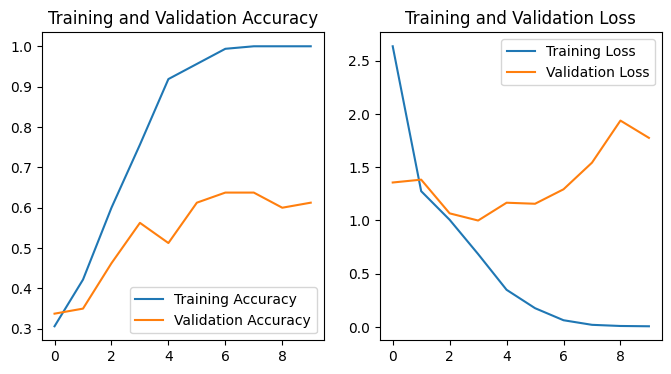

Final CNN Training Accuracy: 1.00
Final CNN Validation Accuracy: 0.61


In [11]:
## Step 5: Evaluate CNN Model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save the trained CNN model
cnn_model.save("vehicle_classification_model.h5")

# Print final accuracies
final_train_accuracy = acc[-1]
final_val_accuracy = val_acc[-1]
print(f"Final CNN Training Accuracy: {final_train_accuracy:.2f}")
print(f"Final CNN Validation Accuracy: {final_val_accuracy:.2f}")
